## Task 2

************************************************************
There are 3 set of X for task 2
X_train_selected_t2, X_valid_selected_t2,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t2_norm,X_valid_selected_t2_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 2 set of Y for task 2
y_train_t2, y_valid_t2
when training, please use: 'y_train_t2_value,y_valid_t2_value'
************************************************************


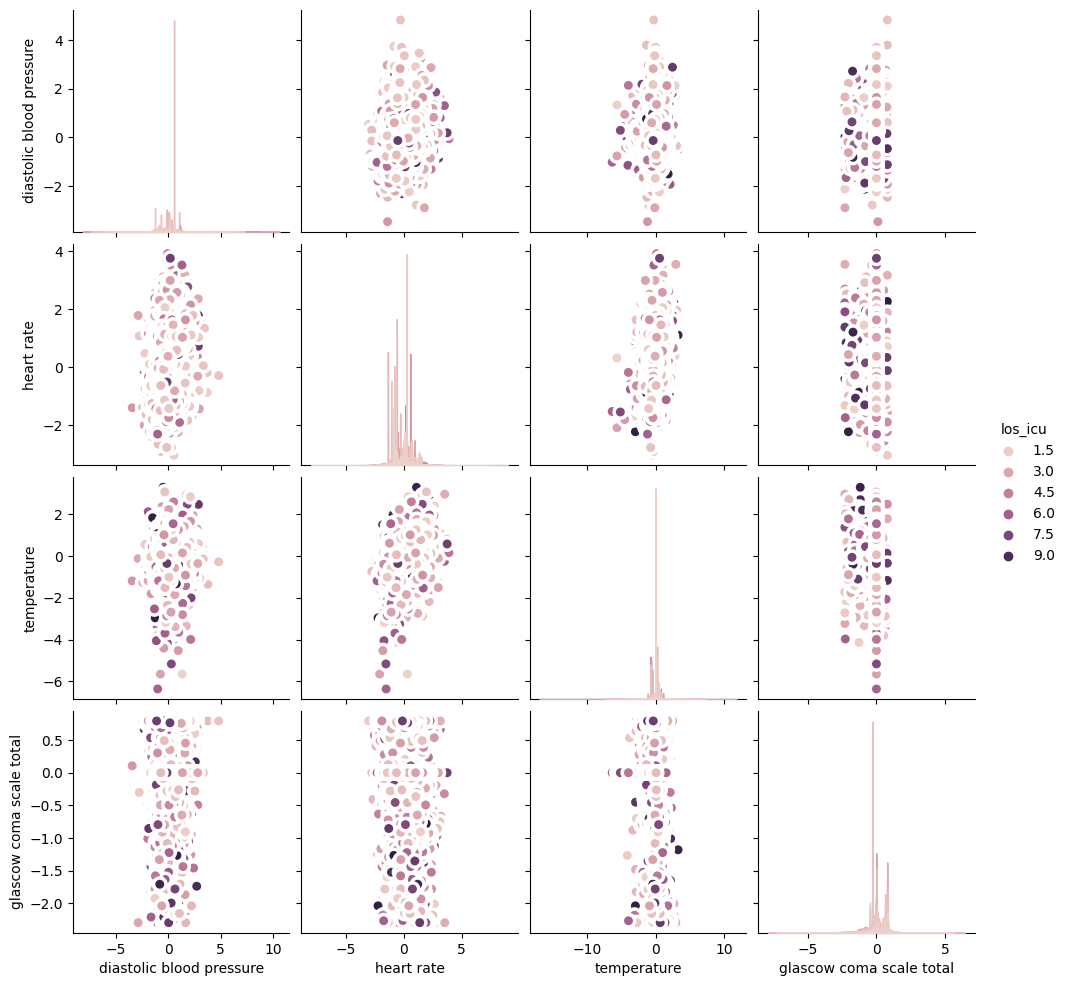

In [3]:
%run Data_preprocessing_realmean_forrun_final_task2.py

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV

Normalized

In [38]:
#Use ElasticNetCV to find the best alpha
enet_cv_model = ElasticNetCV(cv = 10).fit(X_train_selected_t2_norm,y_train_t2_value)


enet_cv_model.alpha_

0.009220416108932808

[1.8813425942026665, 1.88126783945714, 1.8811540770134256, 1.8810497731235607, 1.8810561838504551, 1.8810946016816243, 1.8811748953093024, 1.8812798788860843, 1.8814125036430458, 1.8815743994403848, 1.8817770671048604]


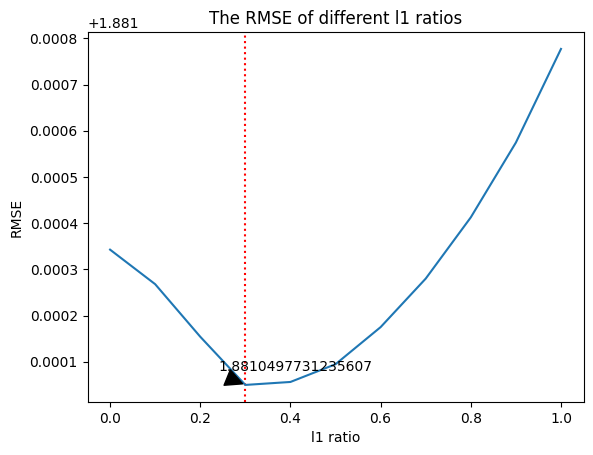

In [42]:
#Find best l1 ratio
l1_ratio_list=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
RMSE_list=[]
for l1_ratio in l1_ratio_list:
    enet_model = ElasticNet(alpha=0.009220416108932808,l1_ratio=l1_ratio).fit(X_train_selected_t2_norm,y_train_t2_value)
    y_predict=enet_model.predict(X_valid_selected_t2_norm)
    MSE=mean_squared_error(y_predict, y_valid_t2_value)
    RMSE=np.sqrt(MSE)
    RMSE_list.append(RMSE)
print(RMSE_list)

min_RMSE=min(RMSE_list)
index= RMSE_list.index(min_RMSE)
loc=l1_ratio_list[index]
plt.title("The RMSE of different l1 ratios")
plt.xlabel("l1 ratio")
plt.ylabel("RMSE")
plt.axvline(x=loc, linestyle="dotted", color='r')
plt.annotate(min_RMSE, (loc, min_RMSE), xycoords="data", xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10, horizontalalignment="center", verticalalignment="top")
plt.plot(l1_ratio_list, RMSE_list)

Output the result

In [40]:
regr = ElasticNet(alpha=0.009220416108932808,l1_ratio=0.3)
regr.fit(X_train_selected_t2_norm,y_train_t2_value)
output=regr.predict(X_test_selected_t2_norm)
#y_pred = regr.predict(X_test_selected_t2)

In [41]:
pd.DataFrame(output).to_excel(excel_writer=r"C:\Users\gcq20\Desktop\STAT3612\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project-\task2_cor.xlsx")